# Richter's Predictor: Modeling Earthquake Damage

# $General\ Overview$

### Introduction

Based on aspects of building location and construction, your goal is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal.

The data was collected through surveys by Kathmandu Living Labs and the Central Bureau of Statistics, which works under the National Planning Commission Secretariat of Nepal. This survey is one of the largest post-disaster datasets ever collected, containing valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics.

### Dataset

* Data was taken from DrivenData -https://www.drivendata.org/competitions/57/nepal-earthquake/
* We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

1 represents low damage

2 represents a medium amount of damage

3 represents almost complete destruction


- ***Features***
    - The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

    - There are 39 columns in this dataset, where the building_id column is a unique and random identifier. The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.


- ***Description of features***
    - ***geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int):*** geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
    - ***count_floors_pre_eq (type: int):*** number of floors in the building before the earthquake.
    - ***age (type: int):*** age of the building in years.
    - ***area_percentage (type: int):*** normalized area of the building footprint.
    - ***height_percentage (type: int):*** normalized height of the building footprint.
    - ***land_surface_condition (type: categorical):*** surface condition of the land where the building was built. Possible values: n, o, t.
    - ***foundation_type (type: categorical):*** type of foundation used while building. Possible values: h, i, r, u, w.
    - ***roof_type (type: categorical):*** type of roof used while building. Possible values: n, q, x.
    - ***ground_floor_type (type: categorical):*** type of the ground floor. Possible values: f, m, v, x, z.
    - ***other_floor_type (type: categorical):*** type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
    - ***position (type: categorical):*** position of the building. Possible values: j, o, s, t.
    - ***plan_configuration (type: categorical):*** building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
    - ***has_superstructure_adobe_mud (type: binary):*** flag variable that indicates if the superstructure was made of Adobe/Mud.
    - ***has_superstructure_mud_mortar_stone (type: binary):*** flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
    - ***has_superstructure_stone_flag (type: binary):*** flag variable that indicates if the superstructure was made of Stone.
    - ***has_superstructure_cement_mortar_stone (type: binary):*** flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
    - ***has_superstructure_mud_mortar_brick (type: binary):*** flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
    - ***has_superstructure_cement_mortar_brick (type: binary):*** flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
    - ***has_superstructure_timber (type: binary):*** flag variable that indicates if the superstructure was made of Timber.
    - ***has_superstructure_bamboo (type: binary):*** flag variable that indicates if the superstructure was made of Bamboo.
    - ***has_superstructure_rc_non_engineered (type: binary):*** flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
    - ***has_superstructure_rc_engineered (type: binary):*** flag variable that indicates if the superstructure was made of engineered reinforced concrete.
    - ***has_superstructure_other (type: binary):*** flag variable that indicates if the superstructure was made of any other material.
    - ***legal_ownership_status (type: categorical):*** legal ownership status of the land where building was built. Possible values: a, r, v, w.
    - ***count_families (type: int):*** number of families that live in the building.
    - ***has_secondary_use (type: binary):*** flag variable that indicates if the building was used for any secondary purpose.
    - ***has_secondary_use_agriculture (type: binary):*** flag variable that indicates if the building was used for agricultural purposes.
    - ***has_secondary_use_hotel (type: binary):*** flag variable that indicates if the building was used as a hotel.
    - ***has_secondary_use_rental (type: binary):*** flag variable that indicates if the building was used for rental purposes.
    - ***has_secondary_use_institution (type: binary):*** flag variable that indicates if the building was used as a location of any institution.
    - ***has_secondary_use_school (type: binary):*** flag variable that indicates if the building was used as a school.
    - ***has_secondary_use_industry (type: binary):*** flag variable that indicates if the building was used for industrial purposes.
    - ***has_secondary_use_health_post (type: binary):*** flag variable that indicates if the building was used as a health post.
    - ***has_secondary_use_gov_office (type: binary):*** flag variable that indicates if the building was used fas a government office.
    - ***has_secondary_use_use_police (type: binary):*** flag variable that indicates if the building was used as a police station.
    - ***has_secondary_use_other (type: binary):*** flag variable that indicates if the building was secondarily used for other purposes.

### Project Modules & Packages

In [ ]:
!pip install dtreeviz &> /dev/null
!pip install bubble_plot &> /dev/null
!pip3 -q install pandas_profiling --upgrade &> /dev/null
!pip -q show pandas-profiling &> /dev/null
import sys
!{sys.executable} -m pip install deepchecks -U --quiet #--user
!pip install pyyaml==5.4.1
!pip install lightgbm

In [ ]:
!pip -q install optuna

In [ ]:
## General tools
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from pandas_profiling import ProfileReport
from deepchecks.tabular.suites import full_suite
from deepchecks.tabular import Dataset
from deepchecks.tabular.checks import TrainTestLabelDrift
from deepchecks.tabular.suites import single_dataset_integrity
from deepchecks.tabular.suites import train_test_leakage
from deepchecks.tabular.suites import train_test_validation
from deepchecks.tabular.suites import train_test_leakage
from deepchecks.tabular.suites import model_evaluation
from deepchecks.tabular.suites import full_suite
# Imbalanced Data
import imblearn
from imblearn.over_sampling import SMOTE
from bubble_plot.utils import describe_categorical_values
# For transformations and predictions
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.metrics import pairwise_distances
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import warnings
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score, recall_score, precision_score, plot_precision_recall_curve
from sklearn.metrics import log_loss
from sklearn.metrics import pairwise_distances
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.utils.fixes import loguniform
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from sklearn.utils import class_weight

# For validation
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold


# For ensembling
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier,\
                                GradientBoostingClassifier, RandomForestClassifier
# For clustering and noise
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# For validation
from sklearn.model_selection import train_test_split as split


%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# $Features\ Exploration\ \&\ Data\ Wrangling$

### Load CSV file to Pandas DataFrame

In [ ]:
#Shai-
# earthquake_df = pd.read_csv("/content/drive/MyDrive/SSL/EQ_COMP/train_values.csv")
# earthquake_df_labels = pd.read_csv("/content/drive/MyDrive/SSL/EQ_COMP/train_labels.csv")
# erth_test = pd.read_csv("/content/drive/MyDrive/SSL/EQ_COMP/test_values.csv")

#Sharon-
earthquake_df = pd.read_csv("/content/drive/MyDrive/train_values.csv")
earthquake_df_labels = pd.read_csv("/content/drive/MyDrive/train_labels.csv")
erth_test = pd.read_csv("/content/drive/MyDrive/test_values.csv")

In [ ]:
erth_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             86868 non-null  int64 
 1   geo_level_1_id                          86868 non-null  int64 
 2   geo_level_2_id                          86868 non-null  int64 
 3   geo_level_3_id                          86868 non-null  int64 
 4   count_floors_pre_eq                     86868 non-null  int64 
 5   age                                     86868 non-null  int64 
 6   area_percentage                         86868 non-null  int64 
 7   height_percentage                       86868 non-null  int64 
 8   land_surface_condition                  86868 non-null  object
 9   foundation_type                         86868 non-null  object
 10  roof_type                               86868 non-null  object
 11  gr

In [ ]:
earthquake_df_com = earthquake_df.merge(right = earthquake_df_labels ,how='left',on='building_id')

In [ ]:
earthquake_df_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [ ]:
earthquake_df_com.foundation_type.value_counts()

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

### Find missing values

In [ ]:
def missing(data):
    if data.isna().sum().sum()==0:
        return "all missing values treated"
    data = data.isna().sum()/data.shape[0]
    data[data>0].plot(kind='bar', figsize=(16,7))
    all_miss = list(data[data==1].index)
    print("These columns have all the values missing",all_miss)
    plt.title("Missing value plot")
    plt.tight_layout()
    plt.xlabel("Column")
    plt.ylabel("Missing data in %")
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
missing(earthquake_df_com)

'all missing values treated'

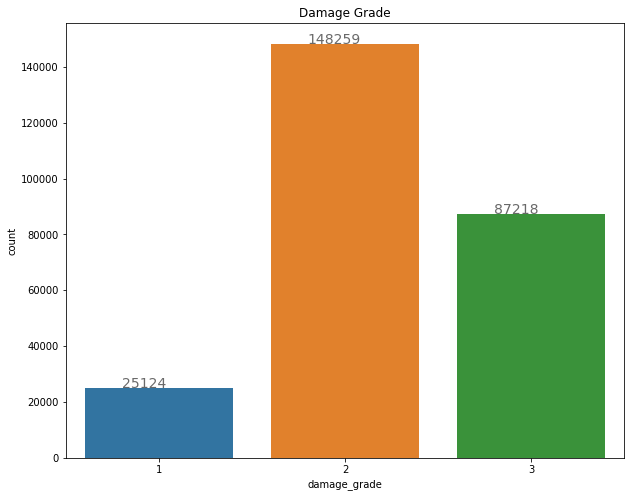

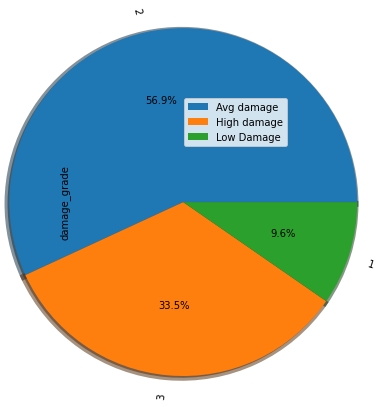

In [ ]:
# checking the dependent variable --> `damage_grade`
plt.figure(figsize=(10,8))
ax=sns.countplot("damage_grade",data=earthquake_df_com)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.2, i.get_height()+3, \
            str(round((i.get_height()), 2)), fontsize=14, color='dimgrey')
plt.title("Damage Grade")
plt.show()  
###############################################################
#                       pie plot                              #                                                            
###############################################################
earthquake_df_com["damage_grade"].dropna().astype(int).value_counts().plot.pie(autopct="%.1f%%", 
                                                    shadow=True,rotatelabels=True,
                                                    wedgeprops={'linewidth': 6},
                                                    radius=2
                                                    )
plt.legend(["Avg damage","High damage","Low Damage"])
plt.show()

#Data Ploting

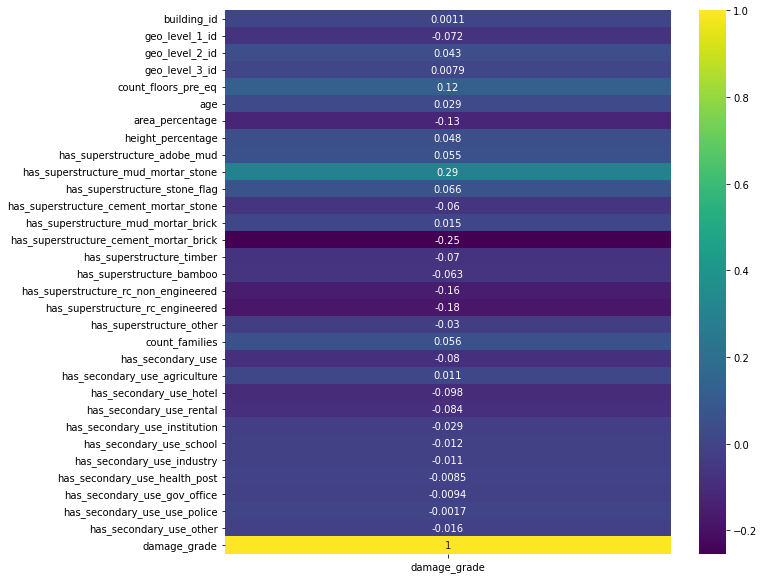

In [ ]:
plt.figure(figsize=(10,10))
cor=earthquake_df_com.corr()["damage_grade"]
cor=pd.DataFrame(cor)
sns.heatmap(cor,annot=True,cmap="viridis")

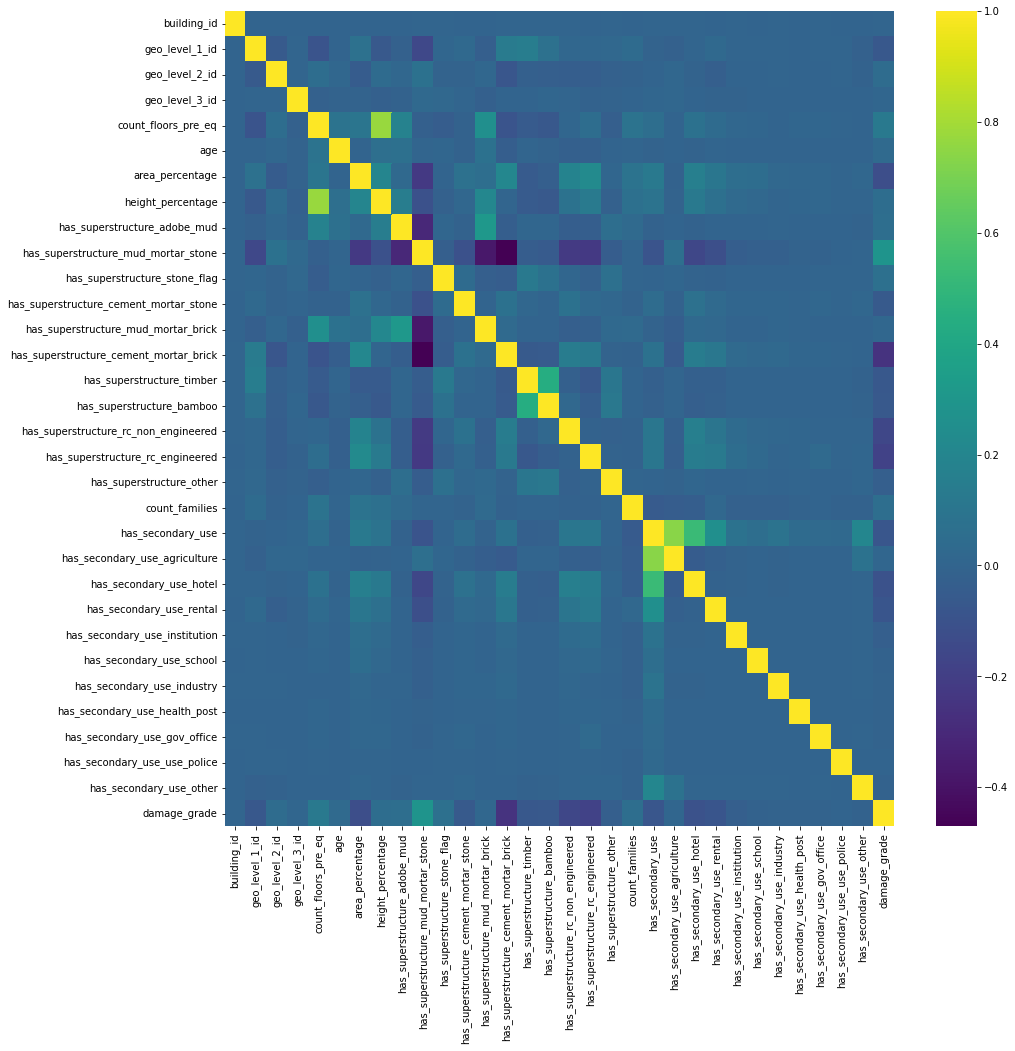

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
cor=earthquake_df_com.corr()
cor=pd.DataFrame(cor)
sns.heatmap(cor,cmap="viridis",ax=ax)

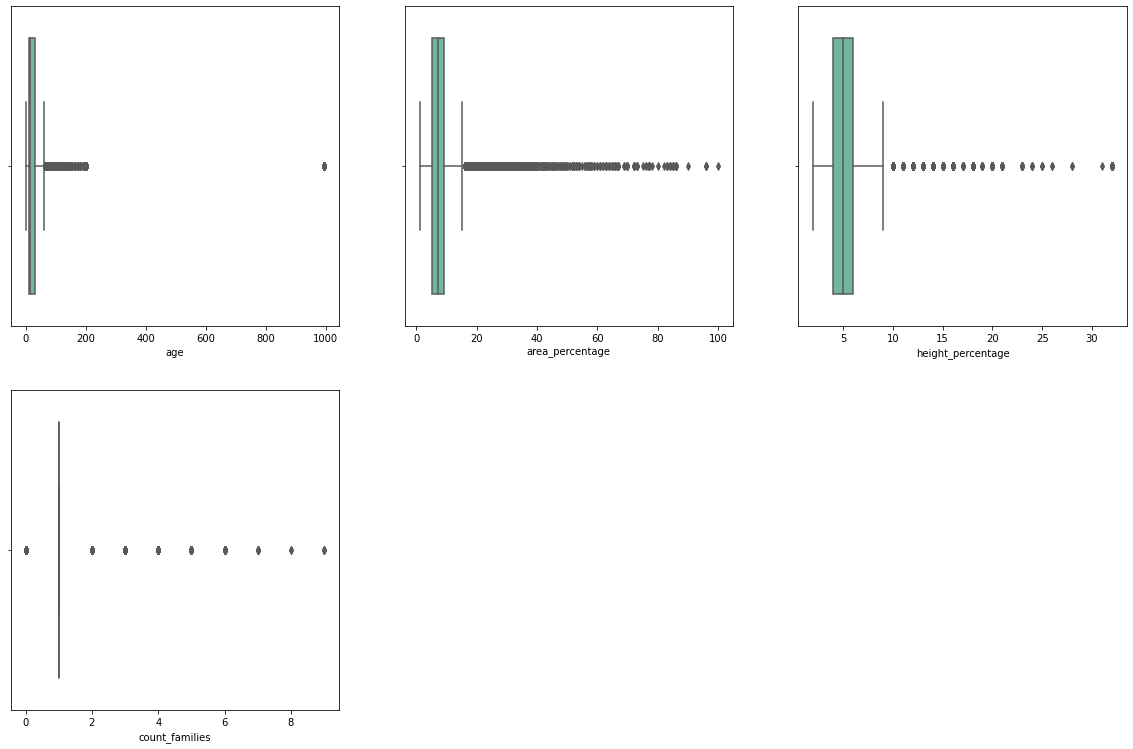

In [ ]:
boxplot_cols=["age","area_percentage","height_percentage","count_families"]
q=1
plt.figure(figsize=(20,20))
for j in boxplot_cols:
    plt.subplot(3,3,q)
    ax=sns.boxplot(earthquake_df_com[j].dropna(),palette="Set2")
    plt.xlabel(j)
    q+=1
plt.show()

### Drop non-contributing Columns/Features

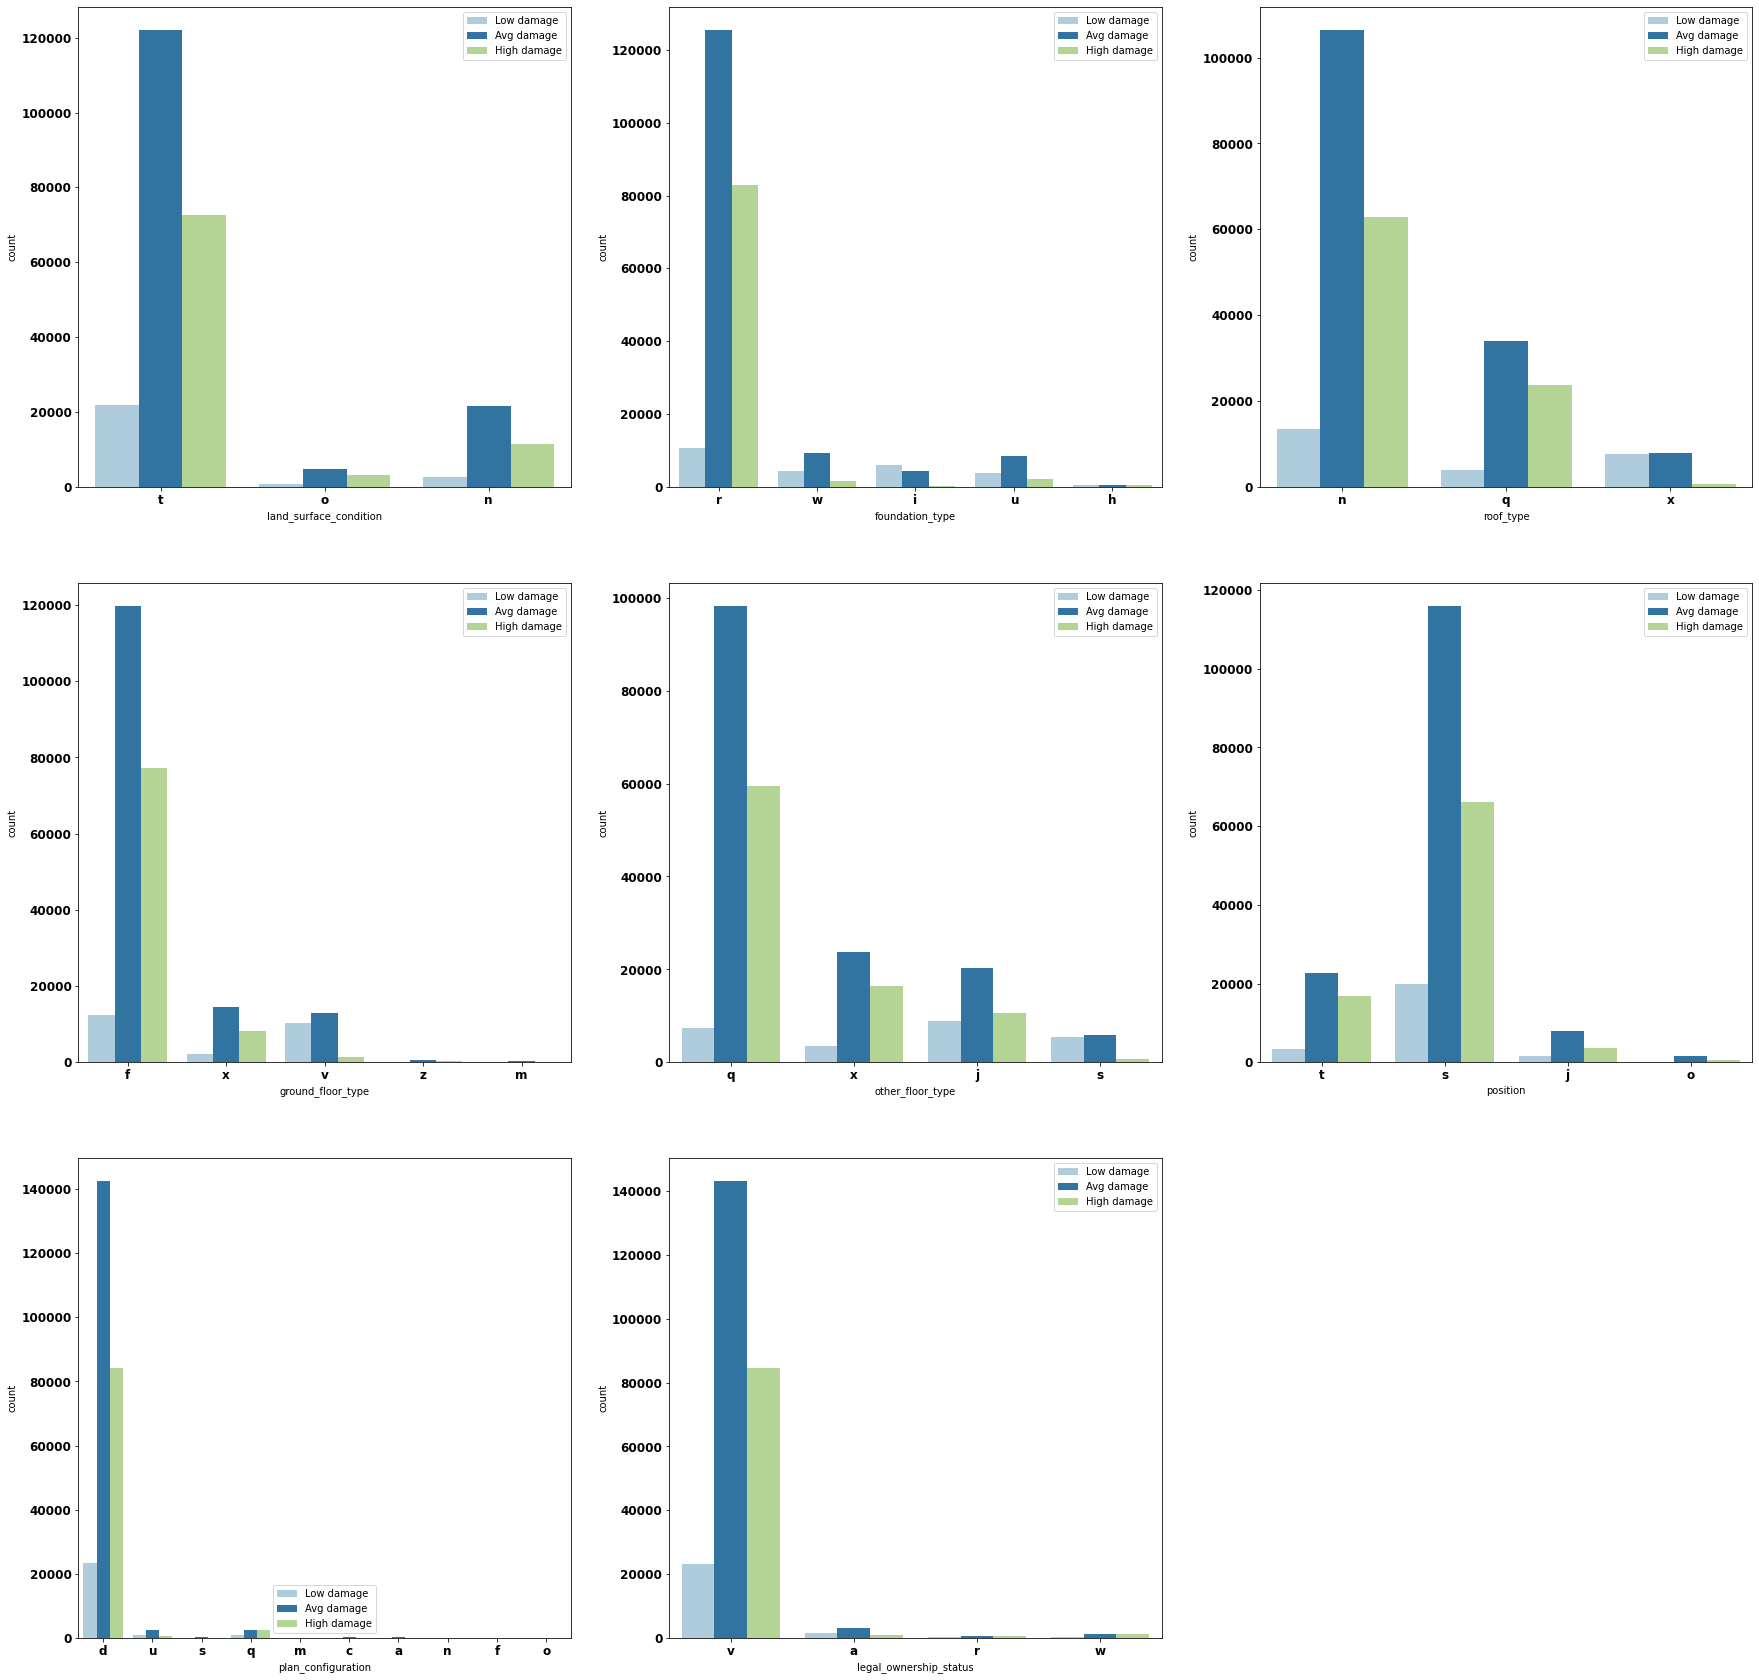

In [ ]:
cat_cols=earthquake_df_com.select_dtypes(include="object")
font = { 'weight' : 'bold', 'size': 12}       
q=1
plt.figure(figsize=(30,30))
for j in cat_cols:
    plt.subplot(3,3,q)
    ax=sns.countplot(earthquake_df_com[j].dropna(),palette="Paired",hue=earthquake_df_com["damage_grade"])
    plt.xticks(**font)
    plt.yticks(**font)
    plt.xlabel(j)
    plt.legend(["Low damage","Avg damage","High damage"])
    q+=1
plt.show()


In [ ]:
earthquake_df_com.drop(['legal_ownership_status','plan_configuration','building_id'],axis=1,inplace=True)

#Get_dummies

In [ ]:
earthquake_df_com = pd.get_dummies(earthquake_df_com,columns=['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position'])

In [ ]:
earthquake_df_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 55 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   geo_level_1_id                          260601 non-null  int64
 1   geo_level_2_id                          260601 non-null  int64
 2   geo_level_3_id                          260601 non-null  int64
 3   count_floors_pre_eq                     260601 non-null  int64
 4   age                                     260601 non-null  int64
 5   area_percentage                         260601 non-null  int64
 6   height_percentage                       260601 non-null  int64
 7   has_superstructure_adobe_mud            260601 non-null  int64
 8   has_superstructure_mud_mortar_stone     260601 non-null  int64
 9   has_superstructure_stone_flag           260601 non-null  int64
 10  has_superstructure_cement_mortar_stone  260601 non-null  int64
 11  

#Pandas profiling

In [ ]:
# Profiling Report
def pd_profile_report(df, make_HTML=True):
    try: 
        print(df.name)
    except:
        df.name = 'temp_name'
    profile = ProfileReport(df, title=f"DF: {df.name}", html={'style': {'full_width': True}});
    if make_HTML:
        profile.to_file(output_file=f'DF{df.name}.html')

# pandas_profiling.ProfileReport(earthquake_df_com)

## Remove outlires

In [ ]:
# Max CAP to numric Values
earthquake_df_com_reduced  = earthquake_df_com
MAX_AGE = 100 
MAX_AP = 60
MAX_HP = 10
MAX_CF = 2


outliers = {'age':MAX_AGE, 'area_percentage':MAX_AP, 'height_percentage':MAX_HP, 'count_families':MAX_CF }

for key in outliers.keys():
    earthquake_df_com_reduced = earthquake_df_com_reduced.loc[earthquake_df_com_reduced[key] <= outliers[key]]

In [ ]:
earthquake_df_com_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252945 entries, 0 to 260599
Data columns (total 55 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   geo_level_1_id                          252945 non-null  int64
 1   geo_level_2_id                          252945 non-null  int64
 2   geo_level_3_id                          252945 non-null  int64
 3   count_floors_pre_eq                     252945 non-null  int64
 4   age                                     252945 non-null  int64
 5   area_percentage                         252945 non-null  int64
 6   height_percentage                       252945 non-null  int64
 7   has_superstructure_adobe_mud            252945 non-null  int64
 8   has_superstructure_mud_mortar_stone     252945 non-null  int64
 9   has_superstructure_stone_flag           252945 non-null  int64
 10  has_superstructure_cement_mortar_stone  252945 non-null  int64
 11  

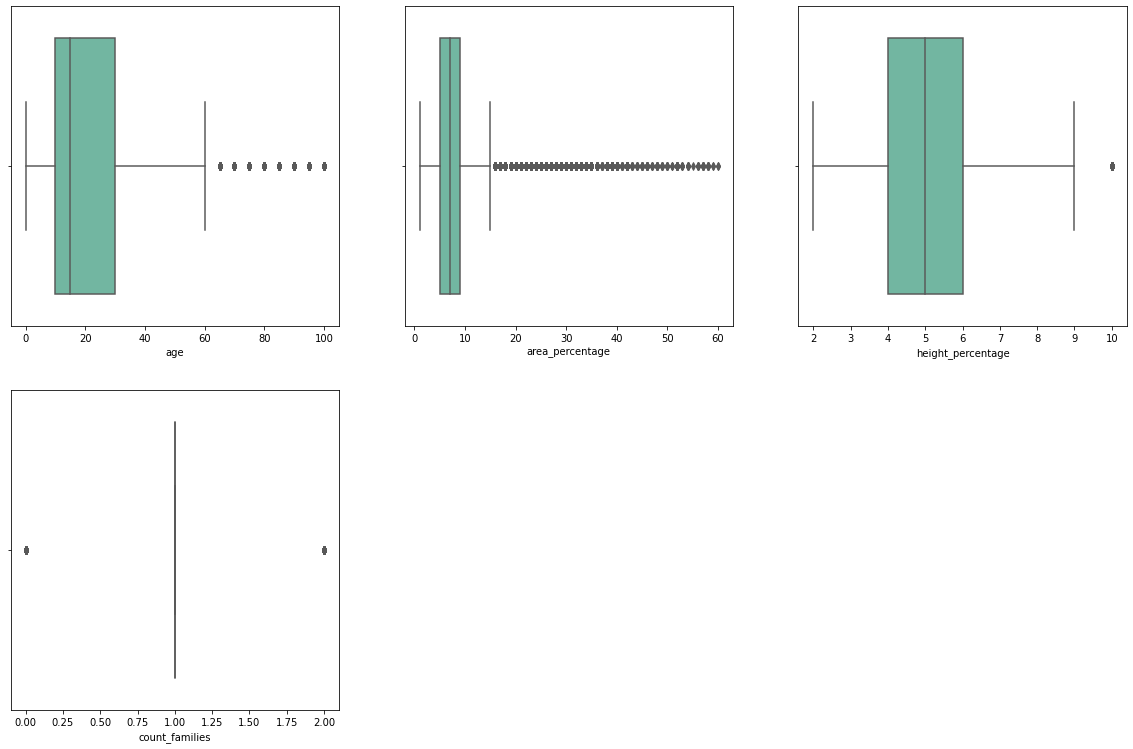

In [ ]:
boxplot_cols=["age","area_percentage","height_percentage","count_families"]
q=1
plt.figure(figsize=(20,20))
for j in boxplot_cols:
    plt.subplot(3,3,q)
    ax=sns.boxplot(earthquake_df_com_reduced[j].dropna(),palette="Set2")
    plt.xlabel(j)
    q+=1
plt.show()

In [ ]:
# DropCount_families
earthquake_df_com_reduced.drop(['count_families'], axis=1, inplace=True)
earthquake_df_com = earthquake_df_com_reduced

# $Features\ Selection$

 Feature Engineering of Geo level ID:

In [ ]:
# generate 2-values encoded categorical feature
def cocncat_2cols(df, col1, col2): 
  series = df[col1].astype(str) + '_' + df[col2].astype(str)
  # df.drop(['col1', 'col2','col3'], axis=1, inplace =True)
  return series

def mean_encode(df, col, target): 
  mean_encode = df.groupby(col)[target].mean()
  #print(mean_encode)
  df.loc[:, col + '_''encode'] = df[col].map(mean_encode)
  return df

In [ ]:
earthquake_df_com['geo_loc_unite'] = cocncat_2cols(earthquake_df_com, 'geo_level_1_id', 'geo_level_2_id')
earthquake_df_com.drop(columns=['geo_level_1_id','geo_level_2_id','geo_level_3_id'], axis=1,inplace= True )

In [ ]:
earthquake_df_com['geo_loc_unite']

0           6_487
1           8_900
2          21_363
3          22_418
4          11_131
           ...   
260595      8_268
260596    25_1335
260597     17_715
260598      17_51
260599      26_39
Name: geo_loc_unite, Length: 252945, dtype: object

# $The\ Models$


## Split train/test
Features(X) / Target(y)

In [ ]:
X = earthquake_df_com.copy()
y = earthquake_df_com.damage_grade

In [ ]:
# transform the dataset
strategy = {1:75000, 2:150000, 3:100000}
oversample = SMOTE(sampling_strategy=strategy,)
X, y = oversample.fit_resample(X, y)

KeyboardInterrupt: ignored

In [ ]:
X_train, X_rem, y_train, y_rem = split(X, y, train_size=0.7, random_state= 35)
X_test, X_valid, y_test, y_valid =split(X_rem,y_rem, test_size=0.5,random_state= 36)

In [ ]:
# MinMaxScaler
def minmaxscaler(df):
  df.reset_index(drop = True, inplace=True)
  df_min_max = df[["age","area_percentage","height_percentage"]]
  df_maxmin = MinMaxScaler().fit_transform(df_min_max)
  ermm = pd.DataFrame(data = df_maxmin , columns=["age","area_percentage","height_percentage"])
  df[["age","area_percentage","height_percentage"]]= ermm[["age","area_percentage","height_percentage"]]
  return df

In [ ]:
mean_encode(X_train,'geo_loc_unite','damage_grade')
mean_encode(X_test,'geo_loc_unite','damage_grade')
mean_encode(X_valid,'geo_loc_unite','damage_grade')

mean_enc = X_train.set_index('geo_loc_unite').to_dict()['geo_loc_unite_encode']
median_ = X_train.groupby("geo_loc_unite")["damage_grade"].mean().median()

X_train.drop(columns=['geo_loc_unite','damage_grade'], axis=1,inplace= True )
X_test.drop(columns=['geo_loc_unite','damage_grade'], axis=1,inplace= True )
X_valid.drop(columns=['geo_loc_unite','damage_grade'], axis=1,inplace= True )

X_train = minmaxscaler(X_train)
X_test = minmaxscaler(X_test)
X_valid = minmaxscaler(X_valid)

y_train.reset_index(drop = True, inplace = True) 
y_test.reset_index(drop = True, inplace = True)
y_valid.reset_index(drop = True, inplace = True)

In [ ]:
median_

2.1538461538461537

In [ ]:
ds_train = Dataset(X_train, label=y_train, cat_features=[])
ds_test =  Dataset(X_test,  label=y_test, cat_features=[])

integ_suite = single_dataset_integrity()
integ_suite.run(ds_train)

## LightGBM

In [ ]:
from optuna.integration import LightGBMPruningCallback

def objective1(trial):
    param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
    }

    model = lgb.LGBMClassifier(objective="multiclass", **param_grid)
    model.fit(
            X_train,
            y_train,
            eval_set=[(X_valid, y_valid)],
            eval_metric="multi_logloss",
            early_stopping_rounds=100,
            callbacks=[
                LightGBMPruningCallback(trial, "multi_logloss")
            ],  # Add a pruning callback
        )
    preds = model.predict(X_test)
    score = f1_score(y_test, preds,average = 'micro')

    return score

In [ ]:
study2 = optuna.create_study(direction="minimize", sampler=TPESampler())

study2.optimize(objective1, n_trials= 5,show_progress_bar = True)

In [ ]:
modellgb = lgb.LGBMClassifier(objective="multiclass", **study2.best_params)
modellgb.fit(
            X_train,
            y_train,
            eval_set=[(X_valid, y_valid)],
            eval_metric="multi_logloss",
            early_stopping_rounds=100,
                   )
y_modellgb = modellgb.predict(X_test)

    
    


In [ ]:
suite = train_test_validation()
suite.run(train_dataset=ds_train, test_dataset=ds_test, model=modellgb)

In [ ]:
suite = train_test_leakage()
suite.run(train_dataset=ds_train, test_dataset=ds_test, model=modellgb)

In [ ]:
suite = full_suite()
suite.run(train_dataset=ds_train, test_dataset=ds_test, model=modellgb)

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(modellgb.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

##XGBoost

In [ ]:
import time
start = time.time()

eval_set = [(X_valid, y_valid)]
param = {'lambda': 0.05970564548497633, 'alpha': 0.7976698271210203, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 0.008, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 25}
clf_xgb = xgb.XGBClassifier(**param)

clf_xgb.fit(X_train,
            y_train,
            verbose = True, #print during run
            early_stopping_rounds = 3, # stop 50 steps after convergence
            eval_metric ='mlogloss' , 
            eval_set= eval_set)



end = time.time()
diff = end - start
print(f'Executtion time is: {diff}')

In [ ]:
y_predclf = clf_xgb.predict(X_test)

In [ ]:
# print(metrics.classification_report(y_test, clf_xgb.predict(X_test)))
# metrics.plot_confusion_matrix(clf_xgb, X_test, y_test, cmap='Blues_r')
# plt.title('Confusion matrix')
# plt.show()

In [ ]:
result = f1_score(y_test, y_predclf,average = 'micro')

In [ ]:
result

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(clf_xgb.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('clf_xgb Features')
plt.tight_layout()
plt.show()
plt.savefig('clf_xgb_importances-01.png')

### optimize XGBoost

In [ ]:
def objective(trial):

    classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
    )
    
    param = {
        'tree_method':'hist',
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 4000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 100),
    }

    model = xgb.XGBClassifier(**param)  
    
    model.fit(X_train,y_train,eval_set=[(X_valid,y_valid)],early_stopping_rounds=100,verbose=False)
    #model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
    y_pred =  model.predict(X_test)
    result = f1_score(y_test, y_pred,average = 'micro')
    
    return result
     

In [ ]:
import optuna
from optuna.samplers import TPESampler
from sklearn.utils import class_weight

study1 = optuna.create_study(direction="maximize", sampler=TPESampler())
study1.optimize(objective, n_trials= 25,show_progress_bar = True)

In [ ]:
study1.best_params
print(study1.best_params)

In [ ]:
#{'lambda': 0.05970564548497633, 'alpha': 0.7976698271210203, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 0.008, 'max_depth': 9, 'random_state': 24, 'min_child_weight': 25}
modelxgb = xgb.XGBClassifier(**study1.best_params)
modelxgb.fit(X_train,y_train,eval_set=[(X_valid,y_valid)],early_stopping_rounds=100,verbose=False)
y_predxgb = modelxgb.predict(X_test)

In [ ]:
suite = full_suite()
suite.run(train_dataset=ds_train, test_dataset=ds_test, model=modelxgb)

## Ensemble models

In [ ]:
y_predlgb1 = pd.DataFrame(y_modellgb,columns=['y_modellgb'])
y_predxgb1 = pd.DataFrame(y_predxgb,columns=['y_predxgb'])
x_all= pd.merge(y_predlgb1, y_predxgb1, left_index=True, right_index=True)

In [ ]:
def trainStackModel(x_train, y_train, n_folds, seed):
    cv = KFold(n_splits= n_folds, random_state=seed,shuffle=True)
    gbm = xgb.XGBClassifier(
     n_estimators= 2000,
     max_depth= 4,
     min_child_weight= 2,
     gamma=0.9,                        
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'multi:softprob', scale_pos_weight=1).fit(x_train, y_train)
    scores = cross_val_score(gbm, x_train, y_train, scoring='f1_micro', cv=cv)
    return scores

In [ ]:
trainStackModel(x_all,y_test,X_test,5,10)

# $Production (Test)$ 

##Drop and transform test coulonms 

In [ ]:
erth_test = pd.read_csv("/content/drive/MyDrive/SSL/EQ_COMP/test_values.csv")

In [ ]:
building_id = erth_test['building_id']
erth_test.drop(['legal_ownership_status','plan_configuration','building_id','count_families'],axis=1,inplace=True)
erth_test = pd.get_dummies(erth_test,columns=['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position'])

In [ ]:
mean_encode

### Production pipeline

In [ ]:
erth_test['geo_loc_unite'] = cocncat_2cols(erth_test, 'geo_level_1_id', 'geo_level_2_id')
erth_test['geo_loc_unite_encode']= erth_test['geo_loc_unite'].map(mean_enc)
erth_test.drop(columns=['geo_level_1_id','geo_level_2_id','geo_level_3_id'], axis=1,inplace= True )
erth_test.drop(['geo_loc_unite'],axis=1,inplace=True)

In [ ]:
erth_test['geo_loc_unite_encode'].isnull().sum()

13

In [ ]:
erth_test['geo_loc_unite_encode'].isnull().sum()
erth_test['geo_loc_unite_encode'].fillna(value = median_, inplace=True)

In [ ]:
erth_test['geo_loc_unite_encode'].isnull().sum()

0

In [ ]:
erth_test = minmaxscaler(erth_test)

In [ ]:
erth_test.geo_loc_unite_encode.value_counts()

## Running models on production 

##XGBoost

In [ ]:
erth_test_prediction = modelxgb.predict(erth_test)
#TODO-CV + STACKING (X_TRAIN + X_TEST)

In [ ]:
erth_test_prediction_df= pd.DataFrame(erth_test_prediction,columns=['damage_grade'])

In [ ]:
erth_test_prediction_df.value_counts()

In [ ]:
earthquake_final_res = erth_test_prediction_df.merge(right = building_id ,how='left',left_index=True,right_index=True)

In [ ]:
earthquake_final_res.set_index(['building_id'],inplace = True)

In [ ]:
from pathlib import Path  
filepath = Path('/content/drive/MyDrive/SSL/EQ_COMP/result.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
earthquake_final_res.to_csv(filepath)  